In [3]:
# Q1 - Importação dos dados e análise das colunas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dados_produtividade_construcao.csv')
print(df.head())
df.info()
print("Colunas e tipos de dados:")
print(df.dtypes)


  nome_obra descricao  produtividade
0    Obra A   Bloco 1             10
1    Obra A   Bloco 2             15
2    Obra B   Bloco 1             10
3    Obra B   Bloco 2             20
4    Obra C   Bloco 1             30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nome_obra      6 non-null      object
 1   descricao      6 non-null      object
 2   produtividade  6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes
Colunas e tipos de dados:
nome_obra        object
descricao        object
produtividade     int64
dtype: object


### Q2 - Perguntas sobre dados


- Quais são as obras mais e menos produtivas?
Isso ajuda a entender quais projetos estão performando bem e quais precisam de ajustes.

- A produtividade varia ao longo do tempo?
Podemos identificar padrões sazonais ou períodos críticos de baixa produtividade.

- Existe um tipo específico de equipe que tem melhor desempenho?
Comparar a produtividade entre equipes pode ajudar na alocação mais eficiente de recursos.

- A produtividade melhora conforme a obra avança?
Se sim, isso pode indicar um aprendizado ao longo do projeto. Se não, pode significar problemas operacionais.

- A produtividade de um bloco afeta a produtividade dos outros?
Talvez um bloco mais lento cause gargalos para os demais.

- Existe alguma relação entre produtividade e fatores externos (como clima ou atrasos no fornecimento de materiais)?
Cruzar dados meteorológicos ou de logística pode revelar correlações inesperadas.

- Qual é o impacto da experiência da equipe na produtividade?
Equipes mais experientes realmente entregam mais? Ou treinamento pode compensar experiência?

- A produtividade de um bloco depende da complexidade da tarefa?
Talvez blocos que exigem mais precisão tenham produtividade naturalmente menor.

- Há um padrão de produtividade dependendo do dia da semana?
Segunda-feira pode ser mais lenta devido ao início da semana, e sexta pode ter quedas por cansaço.

- Se tivéssemos o dobro de orçamento, a produtividade aumentaria proporcionalmente?
Isso pode ajudar a calcular até que ponto mais investimento resulta em ganhos reais.

Obras únicas:
['Obra A' 'Obra B' 'Obra C']
Contagem de apropriações por obra:
nome_obra
Obra A    2
Obra B    2
Obra C    2
Name: produtividade, dtype: int64
Estatísticas descritivas por obra:
           count  mean       std   min    25%   50%    75%   max
nome_obra                                                       
Obra A       2.0  12.5  3.535534  10.0  11.25  12.5  13.75  15.0
Obra B       2.0  15.0  7.071068  10.0  12.50  15.0  17.50  20.0
Obra C       2.0  27.5  3.535534  25.0  26.25  27.5  28.75  30.0


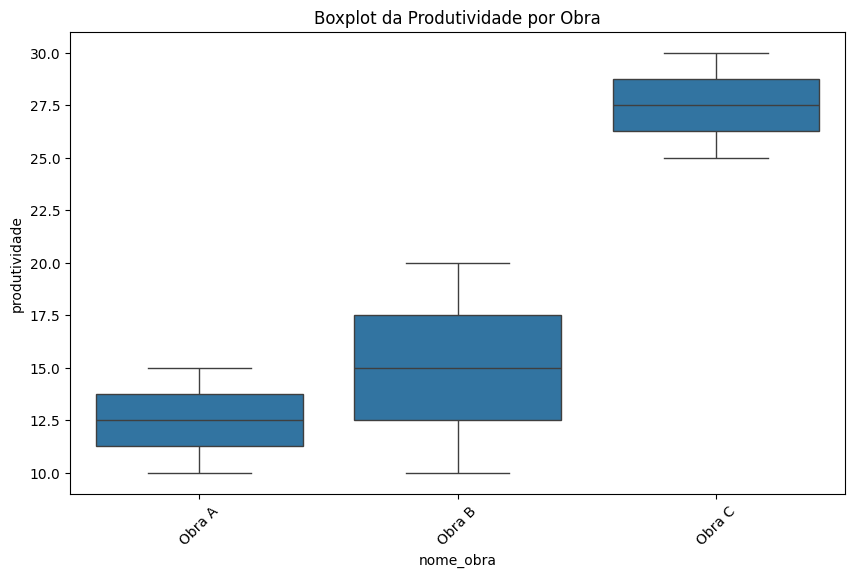

In [23]:
# Q3 - Diferença de produtividade entre obras
print("Obras únicas:")
print(df['nome_obra'].unique())
print("Contagem de apropriações por obra:")
print(df.groupby('nome_obra')['produtividade'].count())
print("Estatísticas descritivas por obra:")
print(df.groupby('nome_obra')['produtividade'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(x='nome_obra', y='produtividade', data=df)
plt.title("Boxplot da Produtividade por Obra")
plt.xlabel("nome_obra")
plt.ylabel("produtividade")
plt.xticks(rotation=45)
plt.show()

Blocos únicos:
['Bloco 1' 'Bloco 2']
Contagem de apropriações por bloco:
descricao
Bloco 1    3
Bloco 2    3
Name: produtividade, dtype: int64
Estatísticas descritivas por bloco:
           count       mean        std   min   25%   50%   75%   max
descricao                                                           
Bloco 1      3.0  16.666667  11.547005  10.0  10.0  10.0  20.0  30.0
Bloco 2      3.0  20.000000   5.000000  15.0  17.5  20.0  22.5  25.0


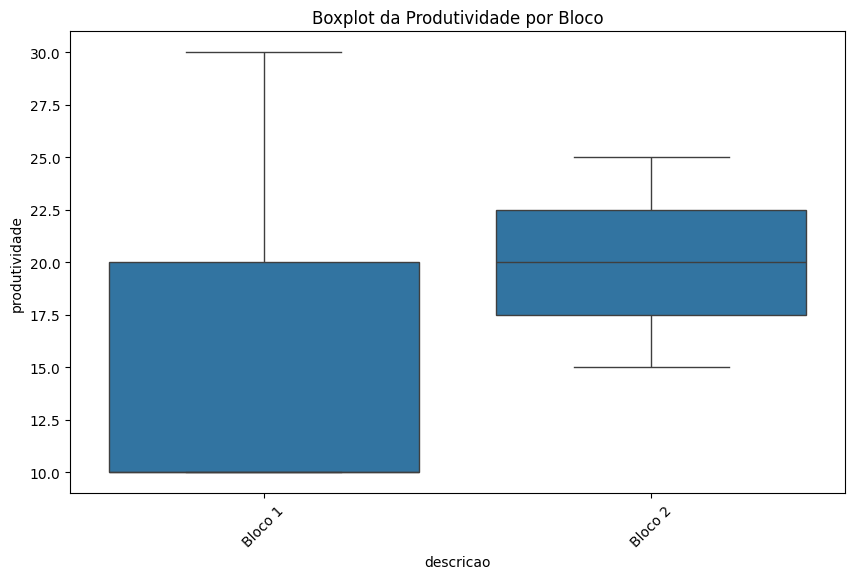

In [24]:
# Q4 - Diferença de produtividade entre blocos (descrição)
print("Blocos únicos:")
print(df['descricao'].unique())
print("Contagem de apropriações por bloco:")
print(df.groupby('descricao')['produtividade'].count())
print("Estatísticas descritivas por bloco:")
print(df.groupby('descricao')['produtividade'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(x='descricao', y='produtividade', data=df)
plt.title("Boxplot da Produtividade por Bloco")
plt.xlabel("descricao")
plt.ylabel("produtividade")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Q5 - Relação entre média e mediana para detecção de outliers
for categoria in ['nome_obra', 'descricao']:
    print(f"\nMédia e Mediana por {categoria}:")
    print(df.groupby(categoria)['produtividade'].agg(['mean', 'median']))


Média e Mediana por nome_obra:
           mean  median
nome_obra              
Obra A     12.5    12.5
Obra B     15.0    15.0
Obra C     27.5    27.5

Média e Mediana por descricao:
                mean  median
descricao                   
Bloco 1    16.666667    10.0
Bloco 2    20.000000    20.0


In [26]:
# Q6 - Bloco com produtividade mais e menos previsível (análise de variabilidade)
variabilidade = df.groupby('descricao')['produtividade'].std()
print("\nDesvio Padrão por Bloco:")
print(variabilidade)


Desvio Padrão por Bloco:
descricao
Bloco 1    11.547005
Bloco 2     5.000000
Name: produtividade, dtype: float64


In [ ]:
# Q7 - O coeficiente (SIURB)

'''
Pelo que entendi do vídeo, esse coeficiente é um jeito de ajustar os valores do orçamento com base em obras passadas. Ele compara o custo que foi planejado com o custo real, pra tentar deixar as previsões mais certeiras.

Ele ajuda a evitar que a gente subestime ou superestime os gastos. Isso é útil porque, na prática, os custos podem mudar bastante por vários motivos, e esse coeficiente serve como um ajuste baseado no que já aconteceu antes.

No fim, a ideia é que os orçamentos fiquem mais realistas e tenham menos erro quando forem usados pra planejar novas obras.
'''